## Nama : Muhamad Ibnu Khaidar Hafiz
### -  Kelas : 4IA15
### - NPM : 50421867

## latihan portofolio

menggunakan pendekatan crisp-dm

### Todo
1. Data Understanding
2. Data Preparation
3. Modelling
4. Evaluasi
5. Deployment

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Understanding

### Import data and load data

In [3]:
df = pd.read_csv('rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


### Cek Shape

In [5]:
df.shape

(2020, 9)

### Cek tipe data

In [6]:
df.dtypes

price                object
nav-link             object
description          object
listing-location     object
bed                 float64
bath                float64
carport             float64
surface_area         object
building_area        object
dtype: object

In [10]:
# cek tipe data secara detailed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


### Statisika Dasar

In [12]:
df.describe()

,bed,bath,carport
count,2001.000000,1999.000000,1713.000000
mean,3.969015,2.941971,1.559253
std,3.671654,3.517671,1.283030
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,49.000000,49.000000,15.000000


In [13]:
df.describe(exclude='object')

,bed,bath,carport
count,2001.000000,1999.000000,1713.000000
mean,3.969015,2.941971,1.559253
std,3.671654,3.517671,1.283030
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,4.000000,3.000000,2.000000
max,49.000000,49.000000,15.000000


In [14]:
df.describe(include='all')

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
count,2020,2020,2020,2020,2001.000000,1999.000000,1713.000000,2019,2019
unique,401,2020,1923,69,NaN,NaN,NaN,343,228
top,"Rp 1,5 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah Dijual di Yogyakarta,"Ngaglik, Sleman",NaN,NaN,NaN,100 m²,36 m²
freq,36,1,18,303,NaN,NaN,NaN,62,116
mean,NaN,NaN,NaN,NaN,3.969015,2.941971,1.559253,NaN,NaN
std,NaN,NaN,NaN,NaN,3.671654,3.517671,1.283030,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,NaN,NaN


### Mendeteksi outlier
dengan boxplot

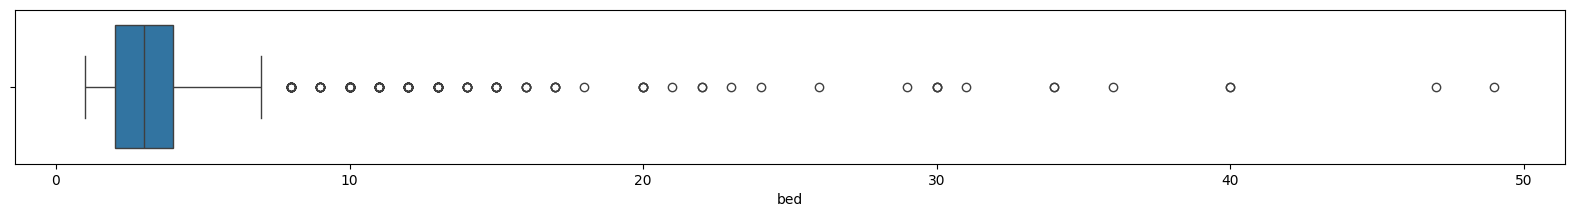

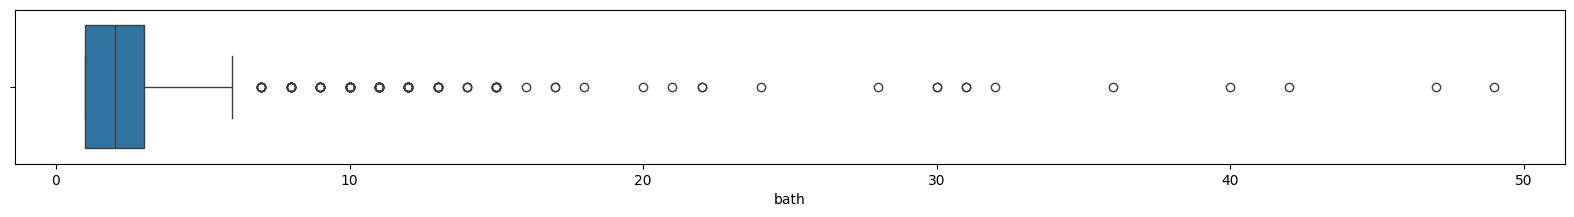

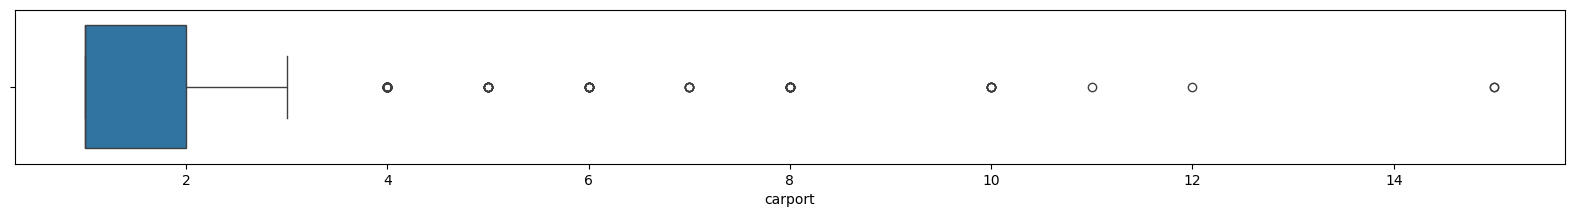

In [15]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
    plt.figure(figsize=(20,2))
    sns.boxplot(data=df_outlier, x=column)

dari boxplot diatas bisa dikatakan bahwa ada outlier

### Menghitung Persentase Outlier

In [17]:
# membuat kuartil 1 dan 3, dengan mengeluarkan tipe data objek dan menunjuk kuantil 0.25 untuk Q1 dan kuantil 0.75 untuk Q3
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

bed        2.0
bath       2.0
carport    1.0
dtype: float64

In [18]:
# Filter outlier pada dataset
outlier_filter = (df.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=['object']) > q3 + 1.5 * iqr)
outlier_filter

,bed,bath,carport
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2015,False,False,False
2016,False,False,False
2017,False,False,False
2018,False,False,False
